In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib as mpl
import os
from matplotlib.lines import Line2D
from collections import Counter
import math
from sklearn.decomposition import PCA
from aging.behavior.syllables import relabel_by_usage
from tqdm import tqdm
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import random
import scipy
from aging.plotting import format_plots, PlotConfig, save_factory, figure, legend, format_pizza_plots
from matplotlib.font_manager import FontProperties
from sklearn.cross_decomposition import PLSRegression
from sklearn.neighbors import KNeighborsRegressor

In [61]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*findfont: Font family \['sans-serif'\] not found.*")

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica']  # Add other fonts if needed

In [62]:
format_plots()
#format_pizza_plots()
c = PlotConfig()
saver = save_factory(c.dana_save_path / "wheel", tight_layout=False)

'''
fig = figure(1.2, 1)
sns.despine()
# saver(fig, 'velocity-vs-age');
# saver(fig, 'scalars-vs-age', tight_layout=True);

fig, ax = plt.subplots(2, 2, figsize=(3.5, 2), sharex=True)

for key, a in zip(scalar_keys, ax.flat):
    scalar_key = key.split("_")[0] if 'height' in key else key.split('_')[1]
    a = sns.lineplot(
        data=scalars,
        x="age",
        y=key,
        color="k",
        err_kws=dict(lw=0),
        ax=a,
        errorbar=("sd"),
        label="Raw",
    )
    a = sns.lineplot(
        data=scalars,
        x="age",
        y=f'recon_{scalar_key}',
        color="darkgreen",
        err_kws=dict(lw=0),
        errorbar="sd",
        ax=a,
        label="Reconstructed",
    )
    a.legend_.remove()
'''

'\nfig = figure(1.2, 1)\nsns.despine()\n# saver(fig, \'velocity-vs-age\');\n# saver(fig, \'scalars-vs-age\', tight_layout=True);\n\nfig, ax = plt.subplots(2, 2, figsize=(3.5, 2), sharex=True)\n\nfor key, a in zip(scalar_keys, ax.flat):\n    scalar_key = key.split("_")[0] if \'height\' in key else key.split(\'_\')[1]\n    a = sns.lineplot(\n        data=scalars,\n        x="age",\n        y=key,\n        color="k",\n        err_kws=dict(lw=0),\n        ax=a,\n        errorbar=("sd"),\n        label="Raw",\n    )\n    a = sns.lineplot(\n        data=scalars,\n        x="age",\n        y=f\'recon_{scalar_key}\',\n        color="darkgreen",\n        err_kws=dict(lw=0),\n        errorbar="sd",\n        ax=a,\n        label="Reconstructed",\n    )\n    a.legend_.remove()\n'

In [63]:
path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_05/wheel_merged.parquet')
df = pd.read_parquet(path)

In [64]:
col=['age', 'mouse', 'cage', 'uuid', 'subject_name', 'date','rotations',
       'cum_rotations_x', 'cum_rotations_y', 'exp']


In [65]:
path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_05/ontogeny_males_clean_pseudotime_v02.parquet')
df_male = pd.read_parquet(path)

In [70]:
## update data
def remove_crl(df):
    max=39
    #x = df.filter(regex=r'\d')
    syll=(['47','48','49','50'])
    df.drop(syll,axis=1, inplace=True)
    #df.drop('m05_c02_b01_s01', level=1, axis=0, inplace=True)
    #df.drop('a85e0616-6a5b-4dd8-a2d6-51701084c25e',level=3, axis=0, inplace=True)
    df.drop('b365ea6a-369f-4991-b139-15694dc1c86d',level=3, axis=0, inplace=True)
    df.drop_duplicates()
    return df[~df.index.get_level_values('session_name').str.contains('CRL')]

In [71]:
# pseudo regression
mdl = KNeighborsRegressor(n_neighbors=10)
x = remove_crl(df_male)
y = x['pseudotime_rank']
x = x.filter(regex=r'\d')
mdl.fit(x, y)
print(mdl.score(x, y))

0.988850168825119


In [72]:
# apply to wheel data
#x = df.drop(['age', 'mouse', 'cage', 'uuid', 'subject_name', 'date','rotations',
#       'cum_rotations_x', 'cum_rotations_y', 'exp'],axis=1)
#x= df.to_numpy()
x = df.filter(regex=r'\d')
#if you want to log transform
#x = np.log(x + 1e-6) # convert to linear
df['psd']=mdl.predict(x)

In [73]:
import math
#df['age_wk'] = df['age']//7
df['age_wk']=(df['age'] / 7).round().astype(int)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

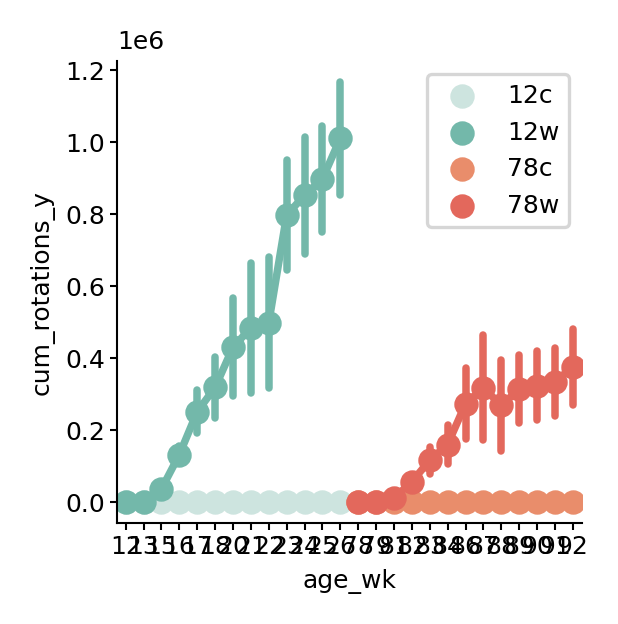

In [74]:
# plot scatter of pseudo time vs real time
figure(2,2)

sns.pointplot(
    data=df,
    x="age_wk",
    y="cum_rotations_y",
    palette = ['#cde4df','#73b8aa','#e98d6b', '#e3685c'],
    estimator='mean',
    errorbar='se',
    hue="exp")
legend=plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
    
sns.despine()

<Axes: xlabel='psd', ylabel='cum_rotations_y'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

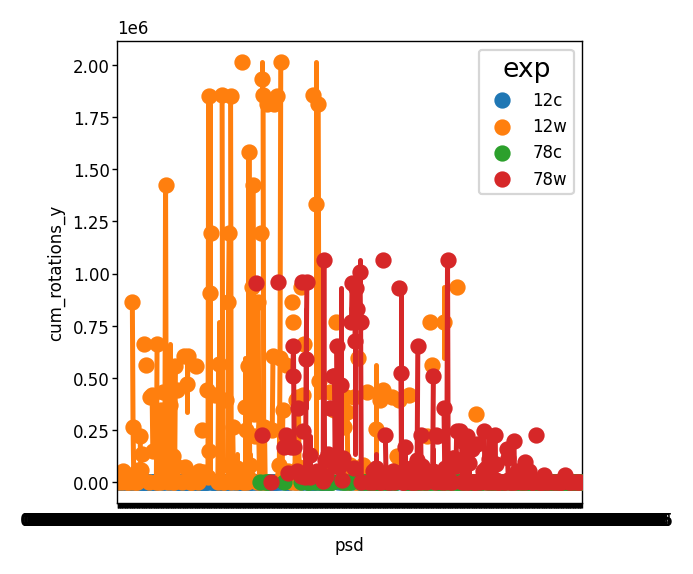

In [75]:
# plot scatter of pseudo time vs real time
sns.pointplot(
    data=df,
    x="psd",
    y="cum_rotations_y",
    hue="exp")

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

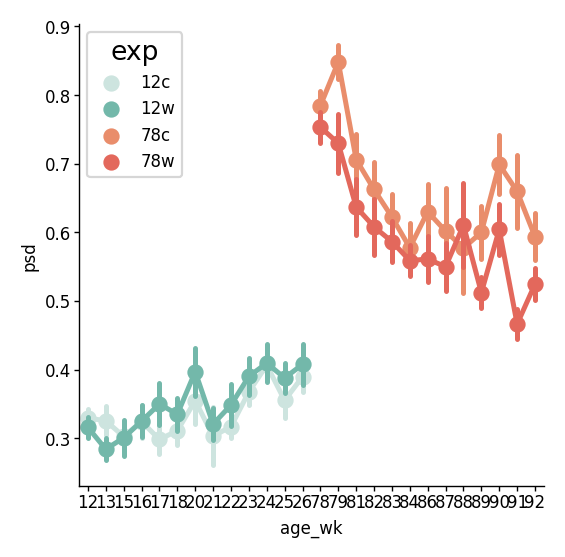

In [76]:
sns.pointplot(
    data=df,
    x="age_wk",
    y="psd",
    palette = ['#cde4df','#73b8aa','#e98d6b', '#e3685c'],
    estimator='mean',
    errorbar='se',
    hue="exp")
sns.despine()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

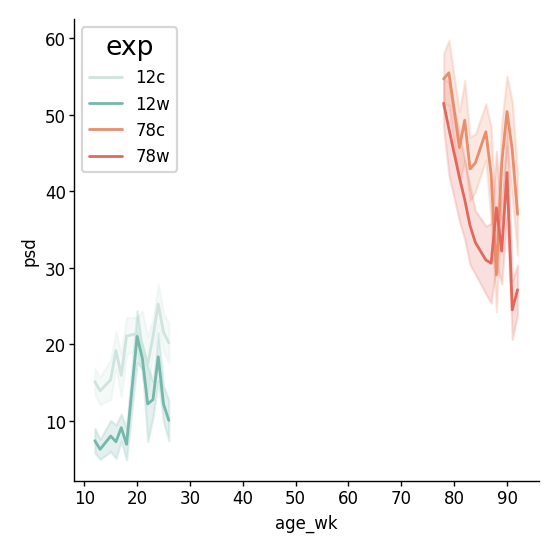

In [83]:
sns.lineplot(
    data=df,
    x="age_wk",
    y="psd",
    palette = ['#cde4df','#73b8aa','#e98d6b', '#e3685c'],
    estimator='mean',
    errorbar='se',
    hue="exp")
sns.despine()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

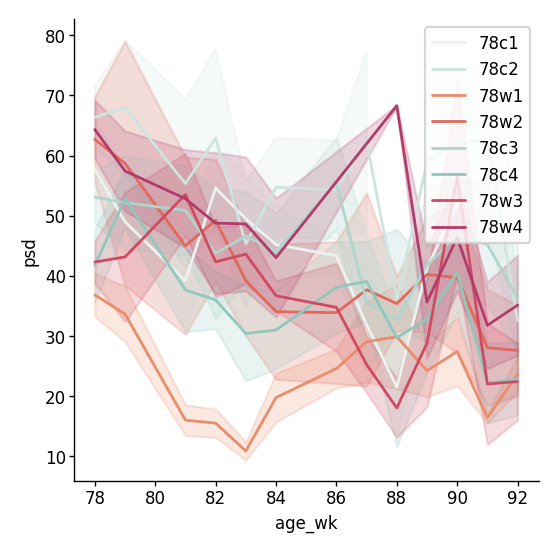

In [84]:
sns.lineplot(
    data=df.query('age_wk>60'),
    x="age_wk",
    y="psd",
    palette = ['#ebf2f0', '#cde4df','#e98d6b', '#e3685c','#afd5cd', '#91c7bc','#d14a61', '#b13c6c'],
    estimator='mean',
    errorbar='se',
    hue="cage")
legend=plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
sns.despine()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

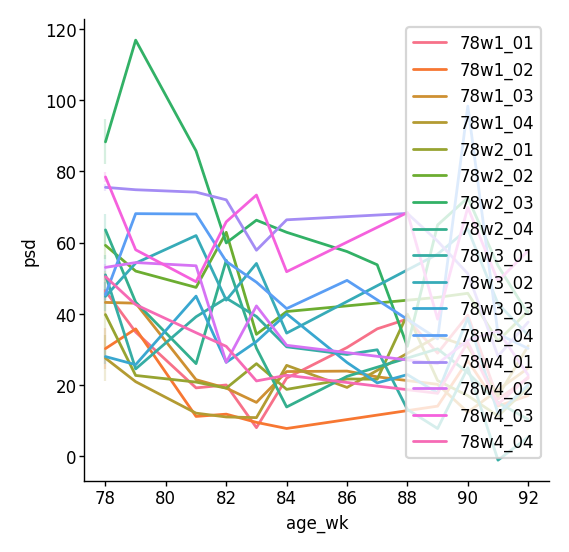

In [85]:
sns.lineplot(
    data=df.query(("age_wk>60 and exp=='78w'")),
    x="age_wk",
    y="psd",
    #palette = ['#ebf2f0', '#cde4df','#e98d6b', '#e3685c','#afd5cd', '#91c7bc','#d14a61', '#b13c6c'],
    estimator='mean',
    errorbar='se',
    hue="mouse")
legend=plt.legend(loc='upper right', bbox_to_anchor=(1, 1))   
sns.despine()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

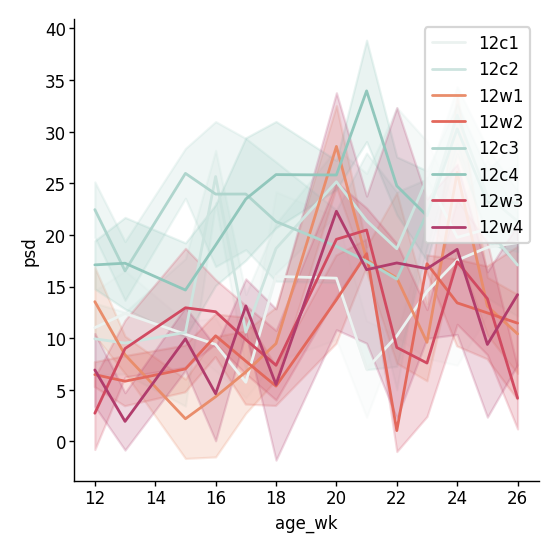

In [86]:
sns.lineplot(
    data=df.query('age_wk<60'),
    x="age_wk",
    y="psd",
    palette = ['#ebf2f0', '#cde4df','#e98d6b', '#e3685c','#afd5cd', '#91c7bc','#d14a61', '#b13c6c'],
    estimator='mean',
    errorbar='se',
    hue="cage")
legend=plt.legend(loc='upper right', bbox_to_anchor=(1, 1))    
sns.despine()

In [87]:
# calcualte absolute diff in psd between begining and end of exp
psd_diff = df.groupby(['mouse','cage','exp']).apply(lambda group: group.loc[group['age_wk'].idxmax()]['psd'] - group.loc[group['age_wk'].idxmin()]['psd'])
psd_diff = psd_diff.reset_index()
psd_diff.columns = ['mouse','cage','exp','diff']

In [88]:
# add total rotations
rotations = df.groupby(['mouse','cage','exp'])['cum_rotations_y'].max().to_numpy()
psd_diff['rotations']=rotations

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

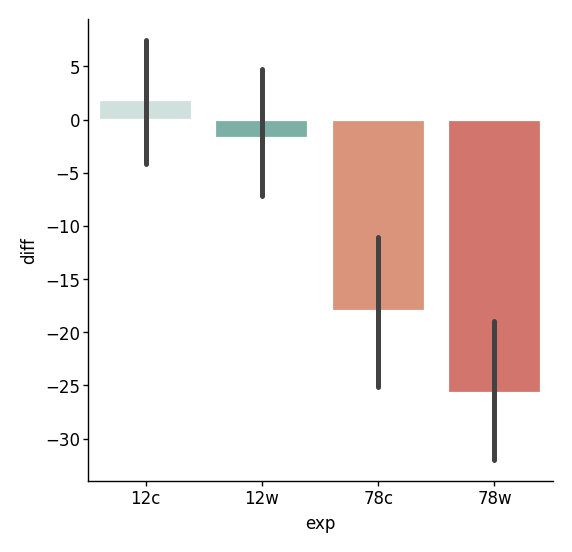

In [89]:
sns.barplot(
    data=psd_diff, 
    x="exp", 
    palette = ['#cde4df','#73b8aa','#e98d6b', '#e3685c'],
    y="diff")
sns.despine()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

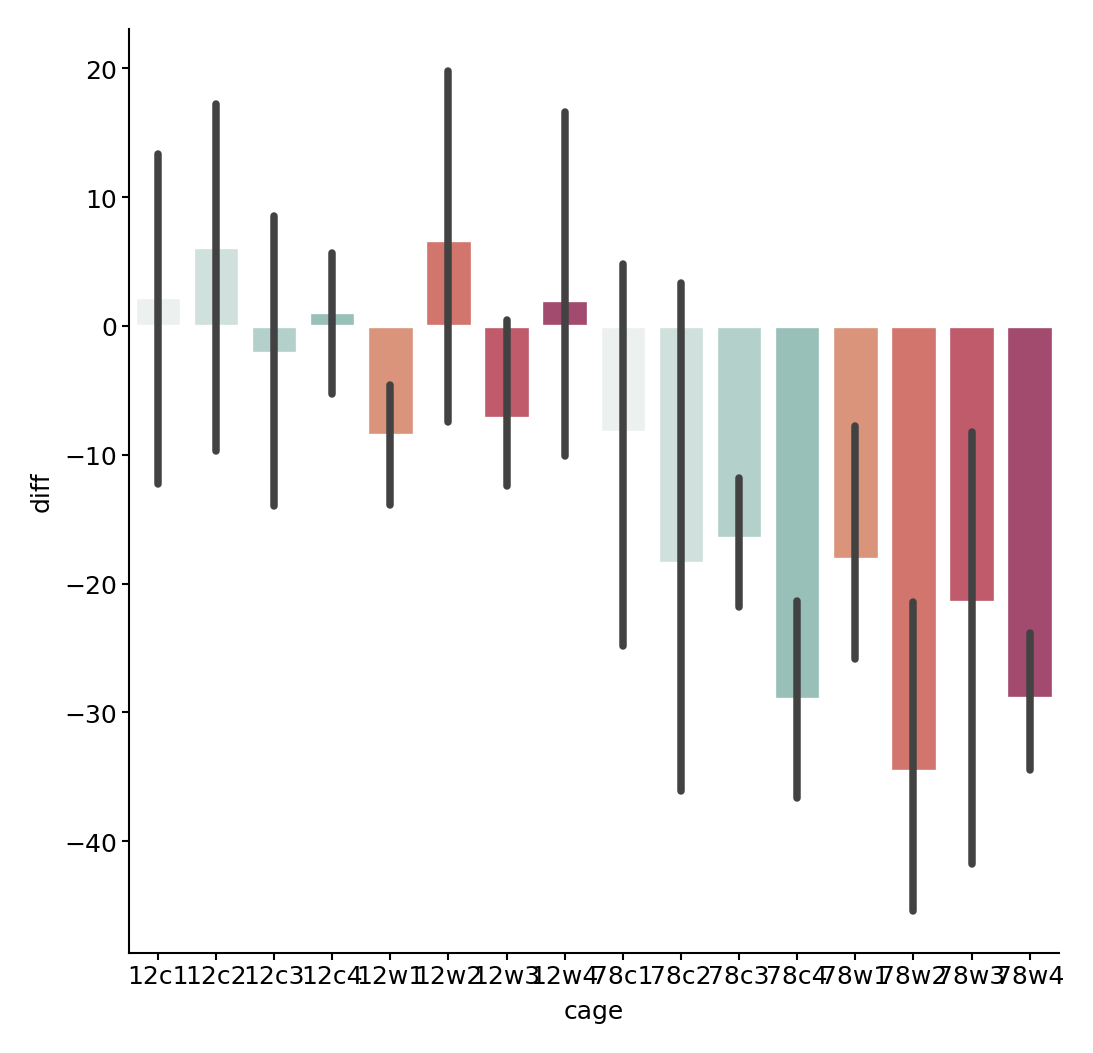

In [90]:
figure(4,4)
sns.barplot(
    data=psd_diff, 
    x="cage", 
    palette = ['#ebf2f0', '#cde4df','#afd5cd', '#91c7bc','#e98d6b', '#e3685c','#d14a61', '#b13c6c','#ebf2f0', '#cde4df','#afd5cd', '#91c7bc','#e98d6b', '#e3685c','#d14a61', '#b13c6c'],
    y="diff")
sns.despine()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

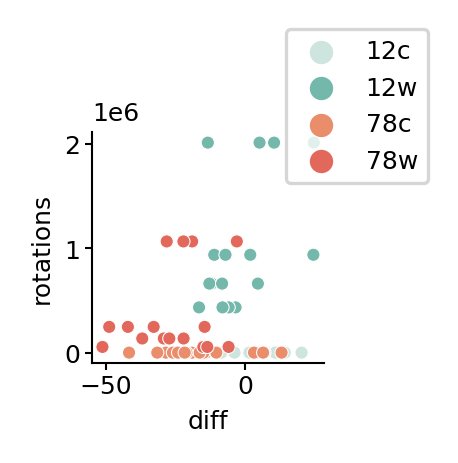

In [91]:
figure(1,1)
sns.scatterplot(
    data=psd_diff, 
    x='diff', 
    hue='exp',
    s=10,
    palette = ['#cde4df','#73b8aa','#e98d6b', '#e3685c'],
    y='rotations'
)
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.5))
sns.despine()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

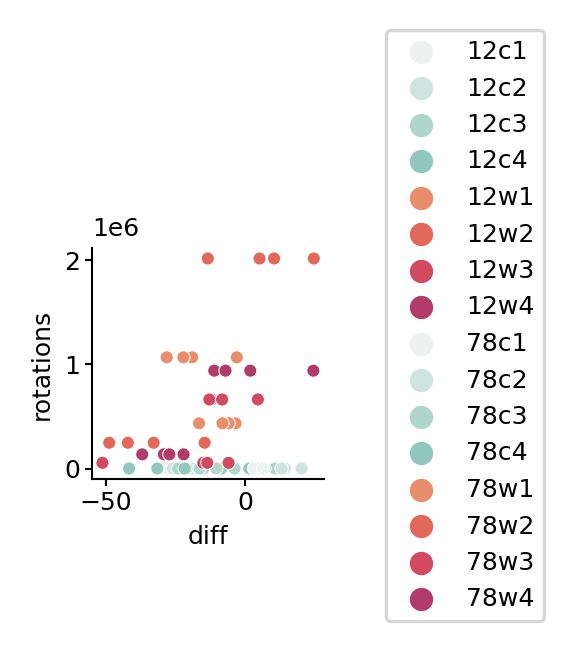

In [92]:
figure(1,1)
sns.scatterplot(
    data=psd_diff, 
    x='diff', 
    hue='cage',
    s=10,
    palette = ['#ebf2f0', '#cde4df','#afd5cd', '#91c7bc','#e98d6b', '#e3685c','#d14a61', '#b13c6c','#ebf2f0', '#cde4df','#afd5cd', '#91c7bc','#e98d6b', '#e3685c','#d14a61', '#b13c6c'],
    y='rotations'
)
plt.legend(loc='upper right', bbox_to_anchor=(2, 2))
sns.despine()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

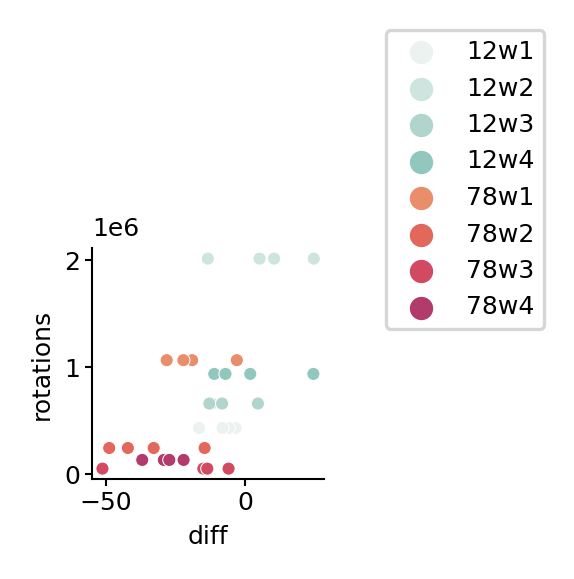

In [93]:
from matplotlib.font_manager import FontProperties
figure(1,1)
sns.scatterplot(
    data=psd_diff.query("exp=='12w' or exp=='78w'"), 
    x='diff', 
    hue='cage',
    s=10,
    palette = ['#ebf2f0', '#cde4df','#afd5cd', '#91c7bc','#e98d6b', '#e3685c','#d14a61', '#b13c6c'],
    y='rotations'
)
legend=plt.legend(loc='upper right', bbox_to_anchor=(2, 2))
# Set the font properties for the legend
font_props = FontProperties()
font_props.set_size('4')  # Set the font size
font_props.set_family('sans-serif')  # Set the font family (e.g., 'serif', 'sans-serif', etc.)

# Apply the font properties to the legend
for text in legend.texts:
    text.set_font_properties(font_props)
    
sns.despine()